This exercise was part of the Coursera course: Applied Plotting, Charting & Data Representation in Python

## Background

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. 

One challenge that users face is that, for a given y-axis value (e.g. 41,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem is to allow users to indicate the y-axis value of interest (e.g. 41,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

## Exercise

Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). Use a 95% confidence interval.

_Note: this was the option in the assignment labelled **Harder**_

In [15]:
#Prepare some random example data and visualize it

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [16]:
#visualize the statistics of the data
print(df.T.describe())

                1992           1993           1994           1995
count    3650.000000    3650.000000    3650.000000    3650.000000
mean    33312.107476   41861.859541   39493.304941   47743.550969
std    200630.901553   98398.356203  140369.925240   69781.185469
min   -717071.175466 -321586.023683 -450827.613097 -189865.963265
25%   -102740.398364  -26628.302213  -57436.397393    1774.555612
50%     29674.931050   43001.976658   41396.781369   49404.322978
75%    167441.838695  108296.577923  137261.713785   94164.333867
max    817505.608159  395586.505068  490091.665037  320826.888044


In [18]:
# Calculate the 95% confidence interval (CI)

# CI = Mean +/- z*(std/sqrt(n))
# for 95% confidence interval for normal distribution: z* =1.96
df['mean']=df.mean(axis=1)
df['std_dev']=df.std(axis=1)
n = 3650
df['ci95']=(1.96*df['std_dev']/np.sqrt(n))
df['ci95_lower']=df['mean']-df['ci95']
df['ci95_upper']=df['mean']+df['ci95']
df

,0,1,2,3,4,5,6,7,8,9,...,3645,3646,3647,3648,3649,mean,std_dev,ci95,ci95_lower,ci95_upper
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538,33350.544468,200513.230710,6505.080475,26845.463993,39855.624943
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855,41866.744076,98337.565678,3190.282138,38676.461937,45057.026214
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049,39511.339788,140285.006497,4551.147340,34960.192447,44062.487128
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908,47737.134571,69738.456750,2262.465533,45474.669039,49999.600104


In [19]:
%matplotlib notebook
import matplotlib as mpl
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

In [6]:
matplotlib.__version__

'2.0.0'

### y-value is the parameter you can change
If you want to see how the colours of the bars change according to different y-values, where the colour of each bar indicates the likelihood that the chosen y-value is lower than the bar's value based on the 95% confidence interval.

<IPython.core.display.Javascript object>


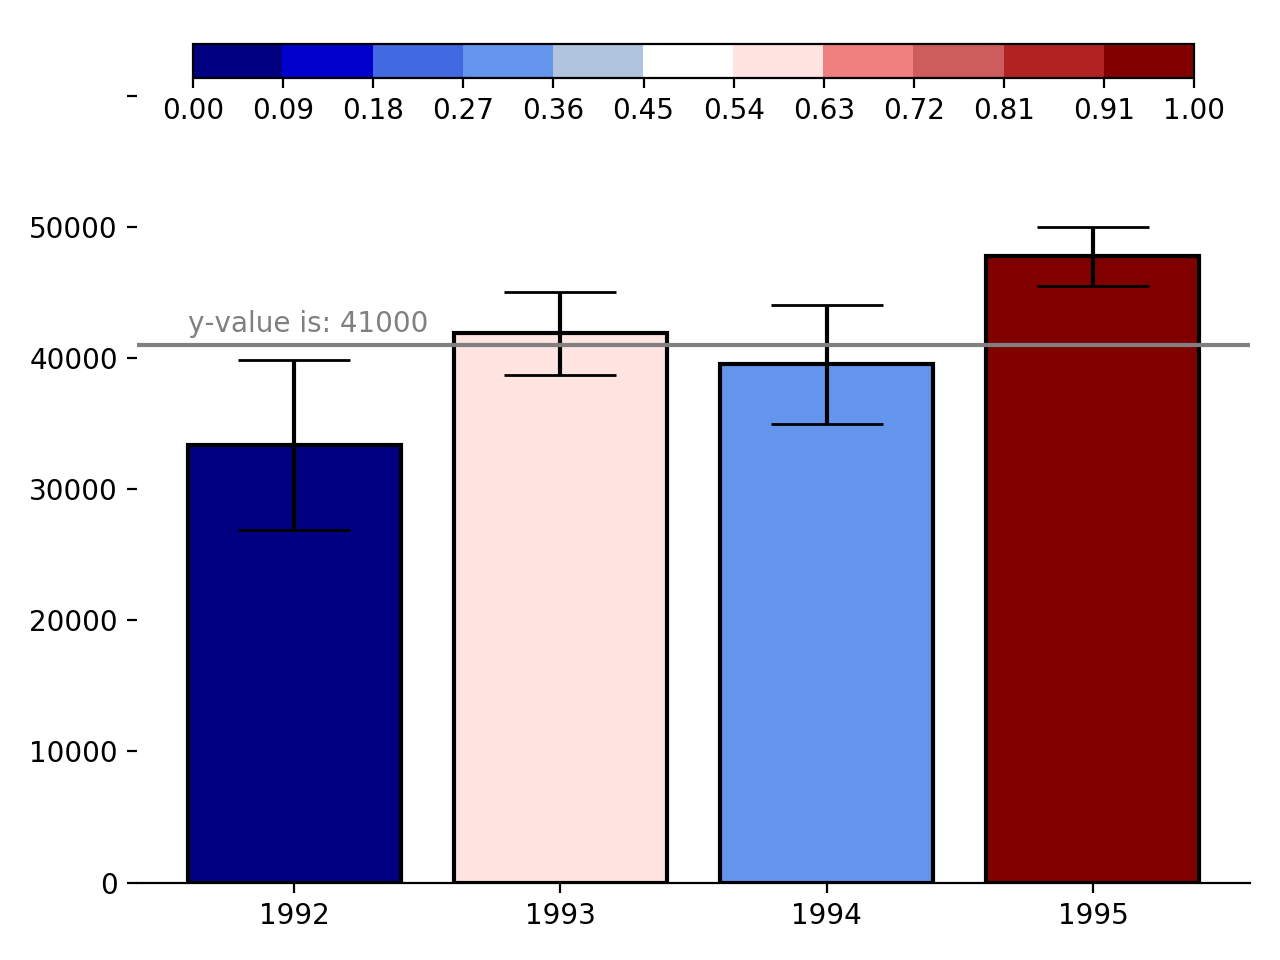

In [34]:
y_value = 41000

cmap = mpl.colors.ListedColormap(['navy','mediumblue','royalblue', 'cornflowerblue', 'lightsteelblue', 'white', 
                                  'mistyrose', 'lightcoral','indianred','firebrick', 'maroon'])

x_pos = np.arange(4)
x_values = ['1992', '1993', '1994', '1995']
#.to_numpy() is better than .values, but only introduced in pandas v0.24.0
bars = plt.bar(x_pos, df['mean'].values, yerr=df['ci95'].values, capsize=20, linewidth=1.5)
plt.xticks(x_pos, x_values)
plt.ylim(0, 65000)
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000], [0, 10000, 20000, 30000, 40000, 50000,])
for i in x_pos:
    diff = y_value - df.loc[i+1992, 'ci95_lower']  
    place = diff/ (2*(df.loc[i+1992, 'ci95']))
    if 0<place<1:
        place2 = 1-place
    elif place<=0:
        place2=1.0
    else:
        place2=0.0
    bars[i].set_color(cmap(place2))
    bars[i].set_edgecolor('black')
plt.tight_layout()
line=plt.axhline(y_value, color='grey')
plt.text(-0.4,y_value+1000,'y-value is: {}'.format(y_value), color='grey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

#add the colorbar
ax2 = mpl_il.inset_axes(plt.gca(), width='90%', height='4%', loc=9)
bounds = [0.0, 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.91, 1.00]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                ticks = bounds,
                                orientation='horizontal',
                                spacing = 'proportional')